<a href="https://colab.research.google.com/github/sprince0031/ICT-Python-ML/blob/main/Week%205/Notebooks/week5_solutions.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python and ML Foundations: Session 5
## Perceptrons, MLPs & Advanced Metrics

Welcome to the session 5 practice notebook! In this practice session, you will participate in not one, but TWO Kaggle competitions with a chance to place on their leaderboard! This will test your understanding of MLP implementation for regression and classification problems. It will also test your understanding of evaluating the true performance of your models with metrics other than accuracy.

## Utility code
Run the cell below to import necessary libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

sns.set_style('whitegrid')
np.random.seed(42)

---
# Video Challenges

## About Kaggle challenges


[Kaggle](https://kaggle.com) is the go-to destination for publicly available datasets. However, it is probably most known for its data science and machine learning competitions. We are going to see how to navigate kaggle and participate in two, one for each challenge this week.

### Before we begin...
You need to make sure you have aK Kaggle account. Please go to [kaggle.com](https://kaggle.com) and sign up if you haven't already.

When you are in a competition page, you will see many tabs that are relevant to the competition.

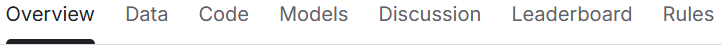

These are self-explanatory. All context for the competition and links to supporting resources should be available in the overview tab.

### The data tab
The dataset to be used for the competition with its detailed description and stats will be available in this tab. If you scroll down past the description to the data explorer section, you will see a preview and a tree view of available files on the right.

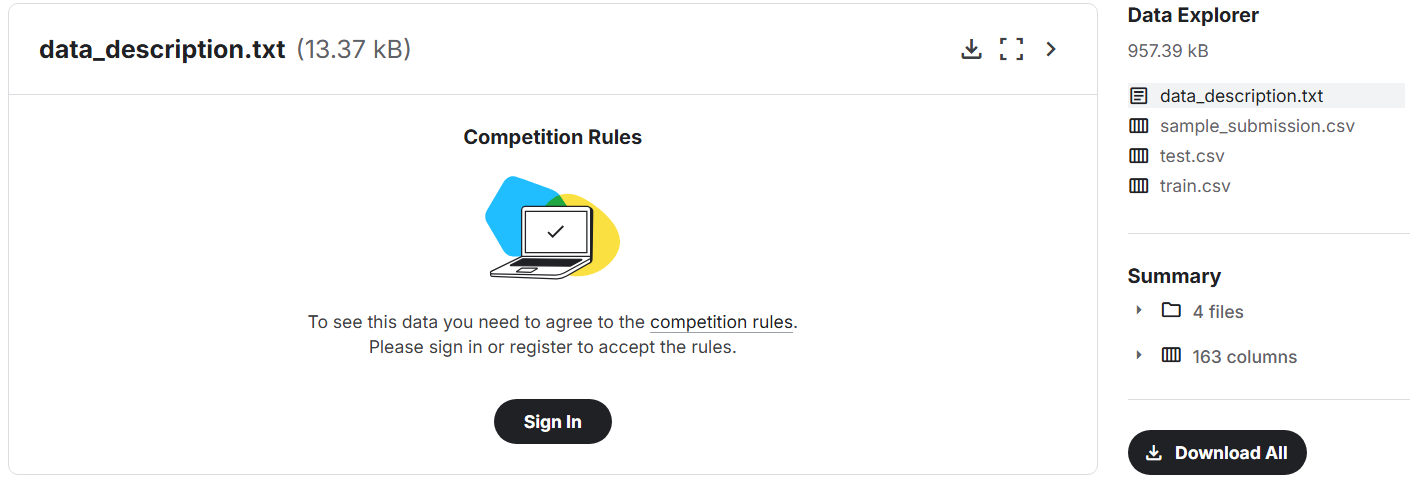

You will need to join the competition by clicking the button to view and download any data files. You will be prompted to read and accept the terms and conditions of the competition.

In Kaggle competitions, you will be given the **training** and **testing** data as **separate files**. In the training file, you will have the target variable which you will train your model to predict. The test file will contain all features ***except for the target variable*** which will be hidden.

**Your goal is to train a model and make predictions on the test dataset and make a submission to the competition on Kaggle for evaluation.**

During an ongoing competition, it is most likely that before the competition finishes, you will be evaluated on a small subset of the test dataset which will give you your initial leaderboard placement. But after the competition closes, your submission will be evaluated on the entirety of the hidden test set and your final leaderboard score will reflect that.

Another helpful resource to make sure your submission is in the right format is the sample_submission file also provided in the data explorer (see screenshot above). This is a sample of the file with the format you need to submit your predictions.

Now, we can get started!!!

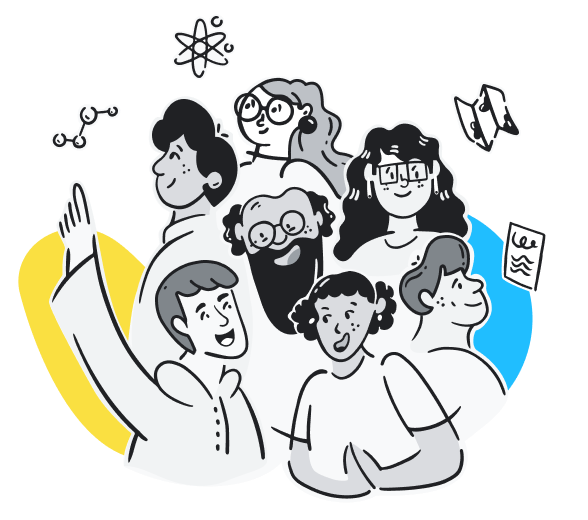

## 1. MLP Regression

Join the `House Prices - Advanced Regression Techniques` rolling competition on Kaggle and attempt to predict house prices using `MLP Regressor`.

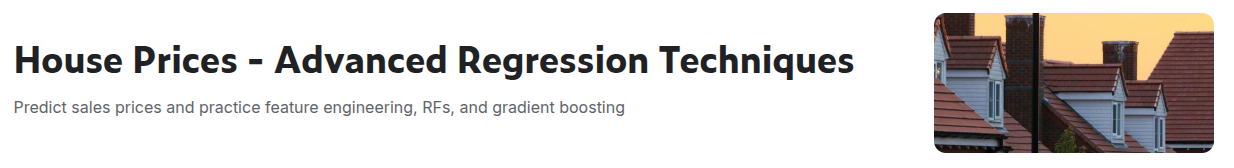

**Your tasks:**
1. Go to the Kaggle competition website: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
2. Join the competition and download the train + test datasets.
3. Load and explore the training dataset i.e., do your Exploratory Data Analysis (EDA).
4. Prepare your dataset into features, `X` and target, `y`.
5. Split the training dataset (yes ignore the test dataset for now) to create a train-validation set.
6. Create and fit an `MLP regressor` model.
7. Test your model on the validation set using RMSE & $R^2$.
8. Play with hyperparameters like activation function, MLP architecture, etc. and run the train-test loop till you are happy with your validation results results.
9. Generate the submission CSV using the test dataset from Kaggle and upload to check your results!

In [2]:
# Task 1: Your code here

train_df = pd.read_csv('/content/train.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

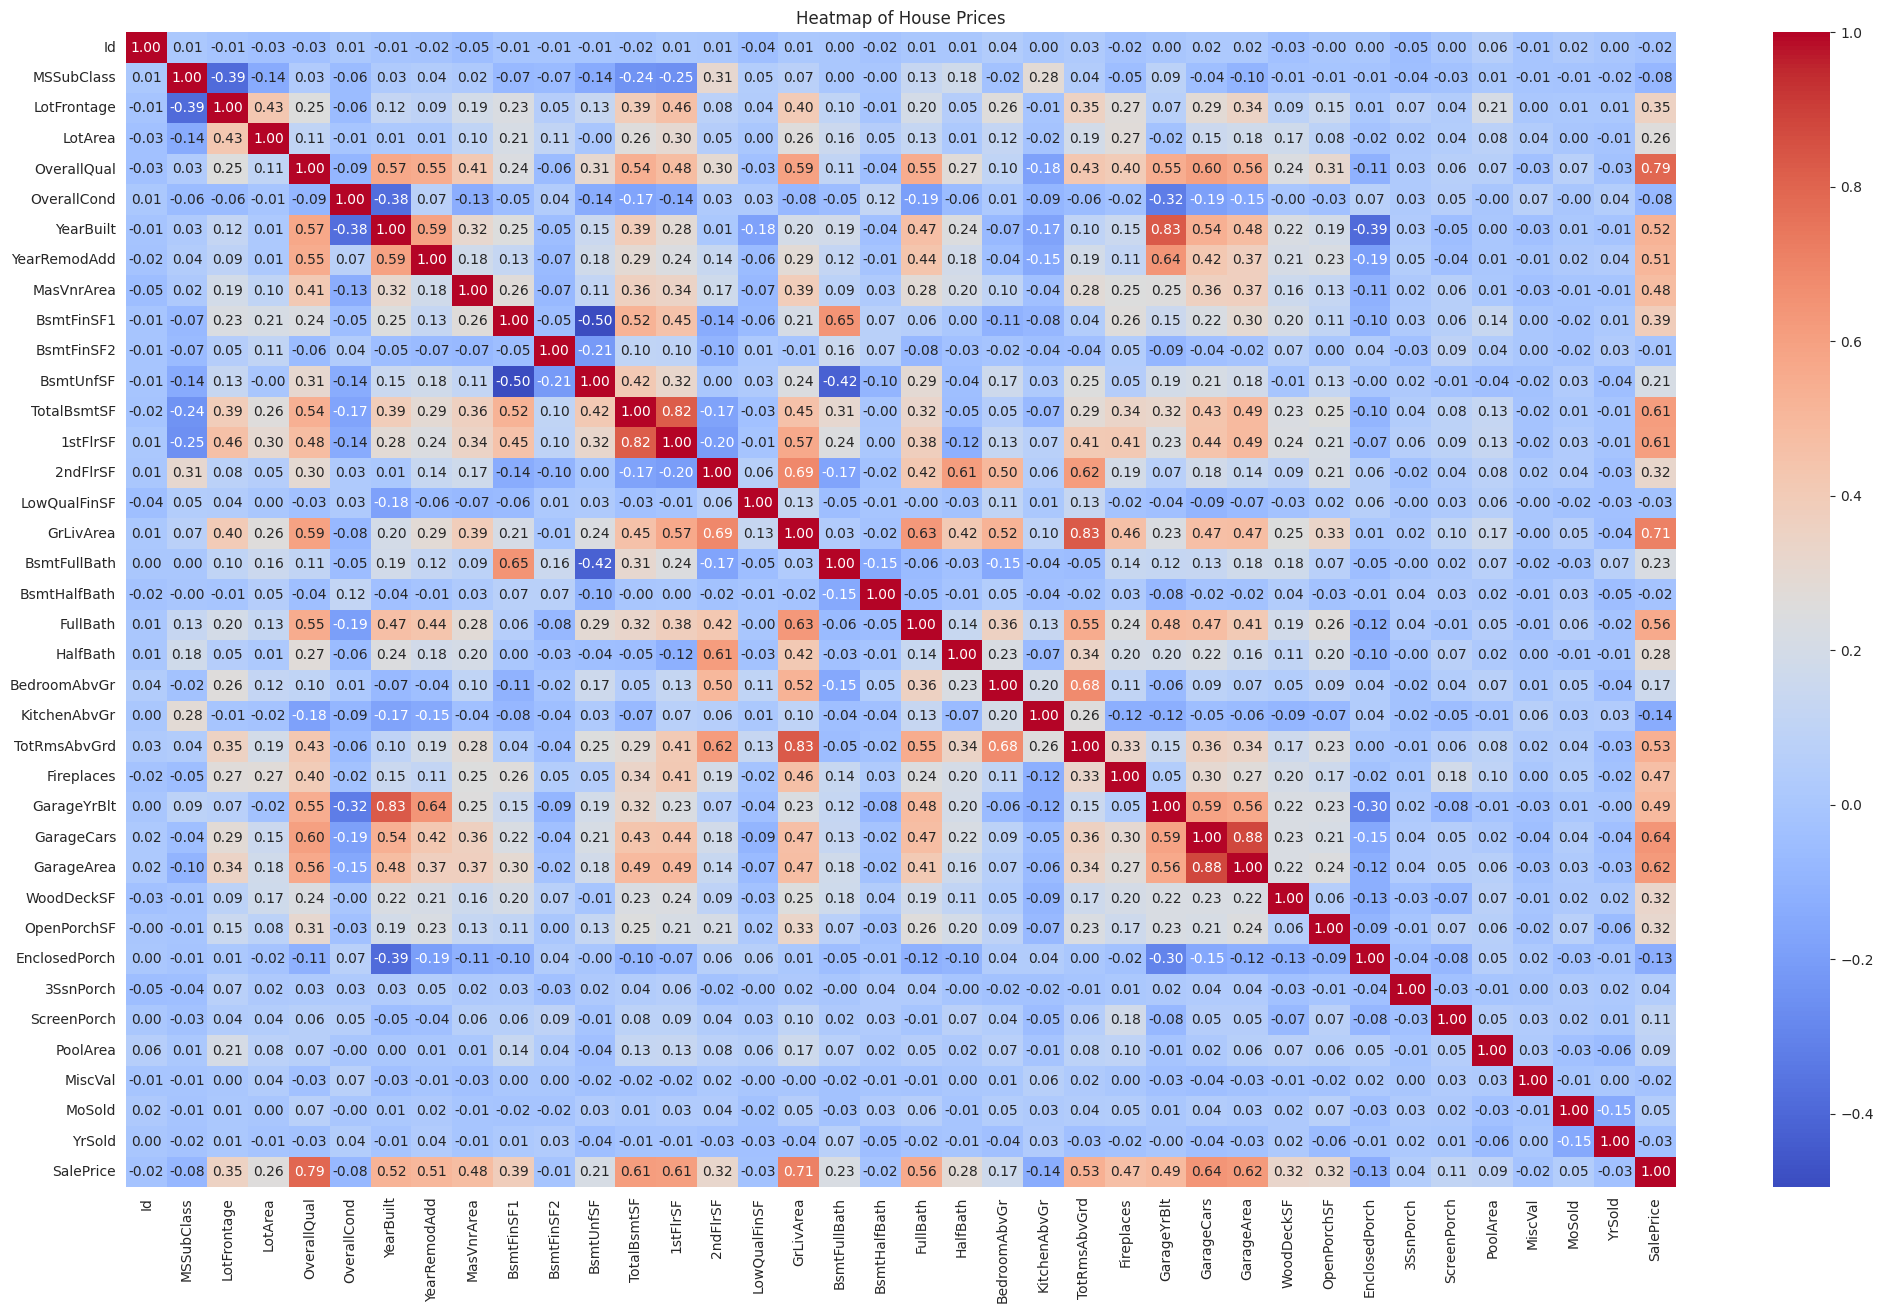

In [7]:
corr_matrix = train_df.corr(numeric_only = True)

plt.figure(figsize=(25,15))
sns.heatmap(data = corr_matrix, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Heatmap of House Prices')
plt.show()

In [8]:
filtered_df = train_df[['OverallQual', 'TotalBsmtSF']]
filtered_df.head()

,OverallQual,TotalBsmtSF
0,7,856
1,6,1262
2,7,920
3,7,756
4,8,1145


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
def perform_preprocessing(data, impute_values):
  data.fillna(impute_values, inplace = True)

  cat_cols = data.select_dtypes(include = ['object']).columns
  data[cat_cols] = data[cat_cols].fillna('Unknown')

  num_cols = data.select_dtypes(include = ['int64', 'float64']).columns
  data[num_cols] = data[num_cols].fillna(0)

  data = pd.get_dummies(data, columns = cat_cols, drop_first = True)

  return data

def preprocess_data(df, target_col, cols_to_drop = None, impute_column_list = None, params = None):
  data = df.copy()
  if params == None:
    data = data.drop(cols_to_drop, axis=1)

    impute_values = {}
    for column in impute_column_list:
        if data[column].dtype == 'object':
            impute_values[column] = data[column].mode()[0] # Use mode for categorical columns
        else:
            impute_values[column] = data[column].mean() # Use mean for numerical columns

    data = perform_preprocessing(data, impute_values)

    X = data.drop(target_col, axis = 1) # Features
    y = data[target_col] # Target variable

    master_column_list = X.columns.tolist()

    params = {
        'impute_values': impute_values,
        'master_column_list': master_column_list
        }

    return X,y, params

  else:

    impute_values = params['impute_values']
    master_column_list = params['master_column_list']

    data = perform_preprocessing(data, impute_values)

    data = data.reindex(columns = master_column_list, fill_value = 0)
    
    return data




In [ ]:
cols_to_drop = ['Alley', 'MasVnrType','MiscFeature', 'Fence', 'PoolQC','Electrical', 'FireplaceQu']  # Remove irrelevant columns 
impute_column_list = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtCond']  # Columns to impute missing values
X , y, params = preprocess_data(train_df, 'SalePrice', cols_to_drop, impute_column_list)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 234 entries, Id to SaleCondition_Partial
dtypes: bool(197), float64(3), int64(34)
memory usage: 703.0 KB


In [19]:
X.isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
...,...
SaleCondition_AdjLand,0
SaleCondition_Alloca,0
SaleCondition_Family,0
SaleCondition_Normal,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
lr = MLPRegressor(hidden_layer_sizes = (50,50,50),activation = 'relu', random_state = 42)

In [38]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50, 50), random_state=42)

In [39]:
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ", rmse)

RMSE =  41406.12656284037


In [ ]:
# r^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score = ", r2)

In [ ]:
test_df = pd.read_csv('/content/test.csv')

test_df.describe()

In [ ]:
testing_data = preprocess_data(test_df, params=params)

In [42]:
y_submission = lr.predict(testing_data)
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_submission})

submission_df.to_csv('submission.csv', index = False)
print(submission_df.head())

     Id      SalePrice
0  1461  151493.605584
1  1462  177707.219330
2  1463  186675.466658
3  1464  190067.119187
4  1465  168552.139313


## 2. MLP Classification

Join the `Titanic - Machine Learning from Disaster` rolling competition on Kaggle and attempt to predict which passengers survived the tragic Titanic shipwreck using an `MLP Classifier`.

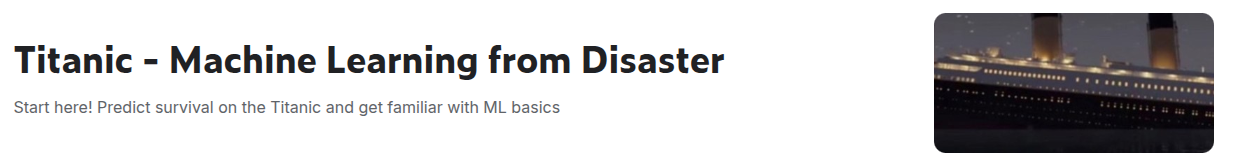

**Your tasks:**
1. Go to the Kaggle competition website: https://www.kaggle.com/c/titanic
2. Join the competition and download the train + test datasets.
3. Load and explore the training dataset i.e., do your Exploratory Data Analysis (EDA).
4. Prepare your dataset into features, `X` and target, `y`.
5. Split the training dataset (yes ignore the test dataset for now) to create a train-validation set.
6. Create and fit an `MLP classifier` model.
7. Test your model on the validation set using accuracy score, precision, recall & F1 score.
8. Play with hyperparameters like activation function, MLP architecture, etc. and run the train-test loop till you are happy with your validation results results.
9. Generate the submission CSV using the test dataset from Kaggle and upload to check your results!


In [2]:
# Task 2: Your code here

titanic_train_df = pd.read_csv('train.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


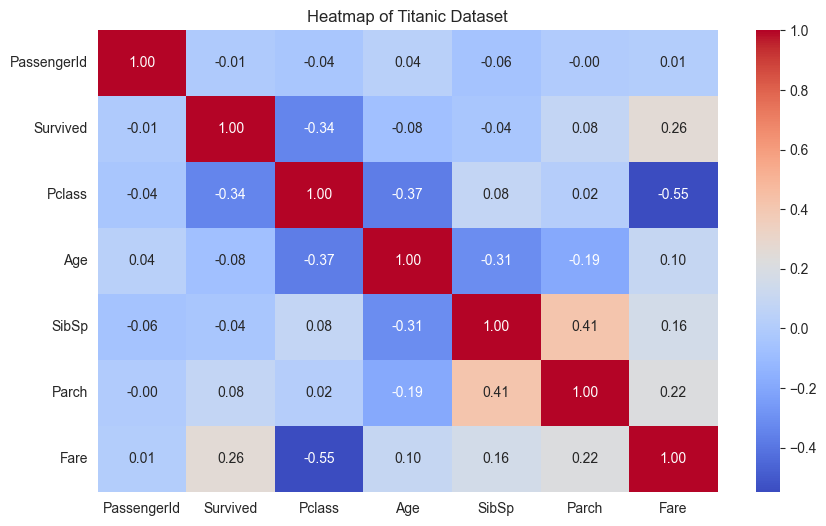

In [4]:
titanic_corr = titanic_train_df.corr(numeric_only = True)
plt.figure(figsize=(10,6))
sns.heatmap(data = titanic_corr, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Heatmap of Titanic Dataset')
plt.show()

From the above correlation matrix, the strongest correlations with survival seem to be the passenger's class (`Pclass`) and `Fare`. The lower the Pclass number i.e., 1st class seems to mean higher chances of survival. Direct correlation with fare is also a very strong indicator that the more expensive the ticket (more expensive for 1st class for instance), the higher the chance of survival. 

In [25]:
cols_to_drop = ['Cabin', 'Ticket', 'Name'] # Remove irrelevant columns 
impute_column_list = ['Embarked'] # Columns to impute missing values
X, y, params = preprocess_data(titanic_train_df, 'Survived', cols_to_drop, impute_column_list)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_male     891 non-null    bool   
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [9]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [60]:
# Train-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [79]:
model = MLPClassifier(hidden_layer_sizes = (20, 50, 100), activation = 'relu', random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 50, 100), random_state=42)

In [81]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy * 100:.2f}%')

Accuracy = 73.13%


In [82]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        78
           1       0.76      0.52      0.62        56

    accuracy                           0.73       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.74      0.73      0.72       134



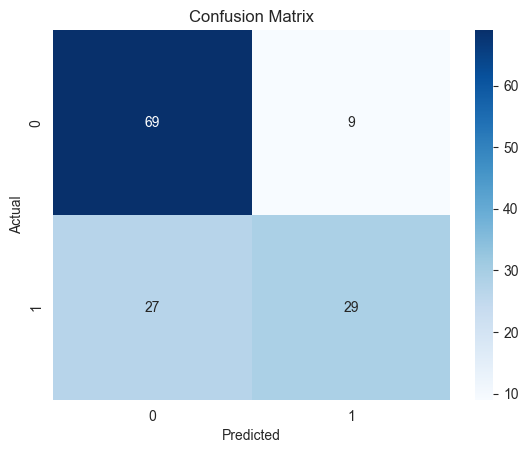

In [83]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
# Get results from test set
titanic_test_df = pd.read_csv('test.csv')
X_test_final = preprocess_data(titanic_test_df, 'Survived', params=params)
y_pred_results = model.predict(X_test_final)

In [ ]:
submission_df = pd.DataFrame({'PassengerId': titanic_test_df['PassengerId'], 'Survived': y_pred_results})
submission_df.to_csv('titanic_submission.csv', index = False) # Save submission file